<a href="https://colab.research.google.com/github/mhieu2001/Market-Basket-Analysis/blob/main/MarketBasketAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded= files.upload()

Saving Groceries_dataset.csv to Groceries_dataset.csv


In [4]:
df=pd.read_csv("Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


Next, I will count the frequency of the product in the table and visualize the graph to see how distribution of product are.

In [28]:
item_frequency = df['itemDescription'].value_counts()
print(item_frequency)

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64


There are **167** unique item in the the data set.

In [29]:
df['itemDescription'].unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

As you can see, there are 3 column with 3 variables in this dataset with: Member_number for IDIndex, Date for when the purchase input and itemDes for name of Item. Fortunately, our dataset is not have any null data. So we do not need to clean anymore
However, Datatype of Date still objective not a datetime so let's convert.

In [6]:
df['date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


<ipython-input-6-65c591dfc8bb>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date']=pd.to_datetime(df['Date'])


In [7]:
df.head

<bound method NDFrame.head of        Member_number        Date        itemDescription       date
0               1808  21-07-2015         tropical fruit 2015-07-21
1               2552  05-01-2015             whole milk 2015-05-01
2               2300  19-09-2015              pip fruit 2015-09-19
3               1187  12-12-2015       other vegetables 2015-12-12
4               3037  01-02-2015             whole milk 2015-01-02
...              ...         ...                    ...        ...
38760           4471  08-10-2014          sliced cheese 2014-08-10
38761           2022  23-02-2014                  candy 2014-02-23
38762           1097  16-04-2014               cake bar 2014-04-16
38763           1510  03-12-2014  fruit/vegetable juice 2014-03-12
38764           1521  26-12-2014               cat food 2014-12-26

[38765 rows x 4 columns]>

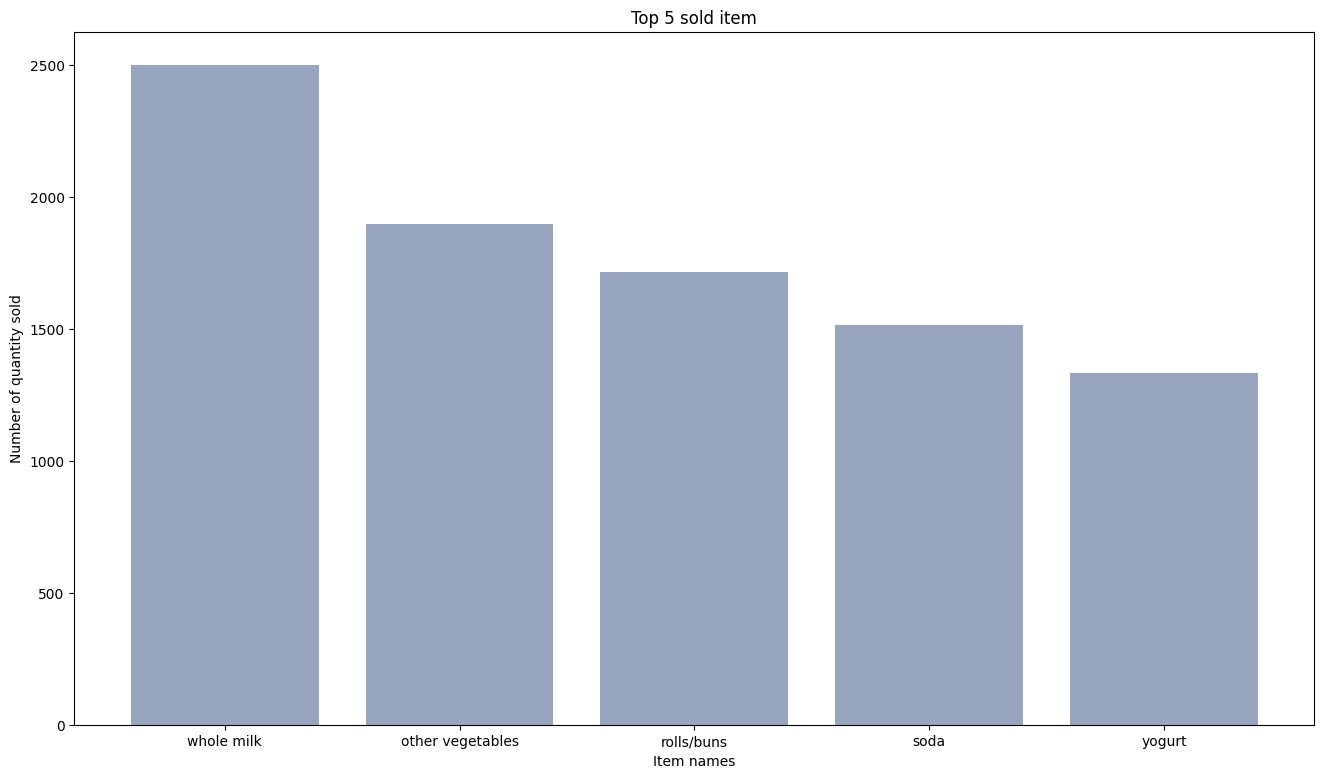

In [13]:
Item_distr=df.groupby(by='itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency',ascending=False).head(5)

bars=Item_distr['itemDescription']
height=Item_distr['Frequency']
x_pos=np.arange(len(bars))

plt.figure(figsize=(16,9))

plt.bar(x_pos,height,color=(0.2,0.3,0.5,0.5))

plt.title('Top 5 sold item')
plt.xlabel('Item names')
plt.ylabel('Number of quantity sold')

plt.xticks(x_pos,bars)

plt.show()

The most 5 products are Whole milk:  2502
Other vegetables         1898,
Rolls/buns               1716,
Soda                     1514,
Yogurt                   1334.

In [23]:
df_date = df.set_index(['date'])
df_date

,Member_number,Date,itemDescription
date,,,
2015-07-21,1808,21-07-2015,tropical fruit
2015-05-01,2552,05-01-2015,whole milk
2015-09-19,2300,19-09-2015,pip fruit
2015-12-12,1187,12-12-2015,other vegetables
2015-01-02,3037,01-02-2015,whole milk
...,...,...,...
2014-08-10,4471,08-10-2014,sliced cheese
2014-02-23,2022,23-02-2014,candy
2014-04-16,1097,16-04-2014,cake bar


I will viz the frequency of the total item by month to see how vary of volume sale change in a years.

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of item sold by Month')]

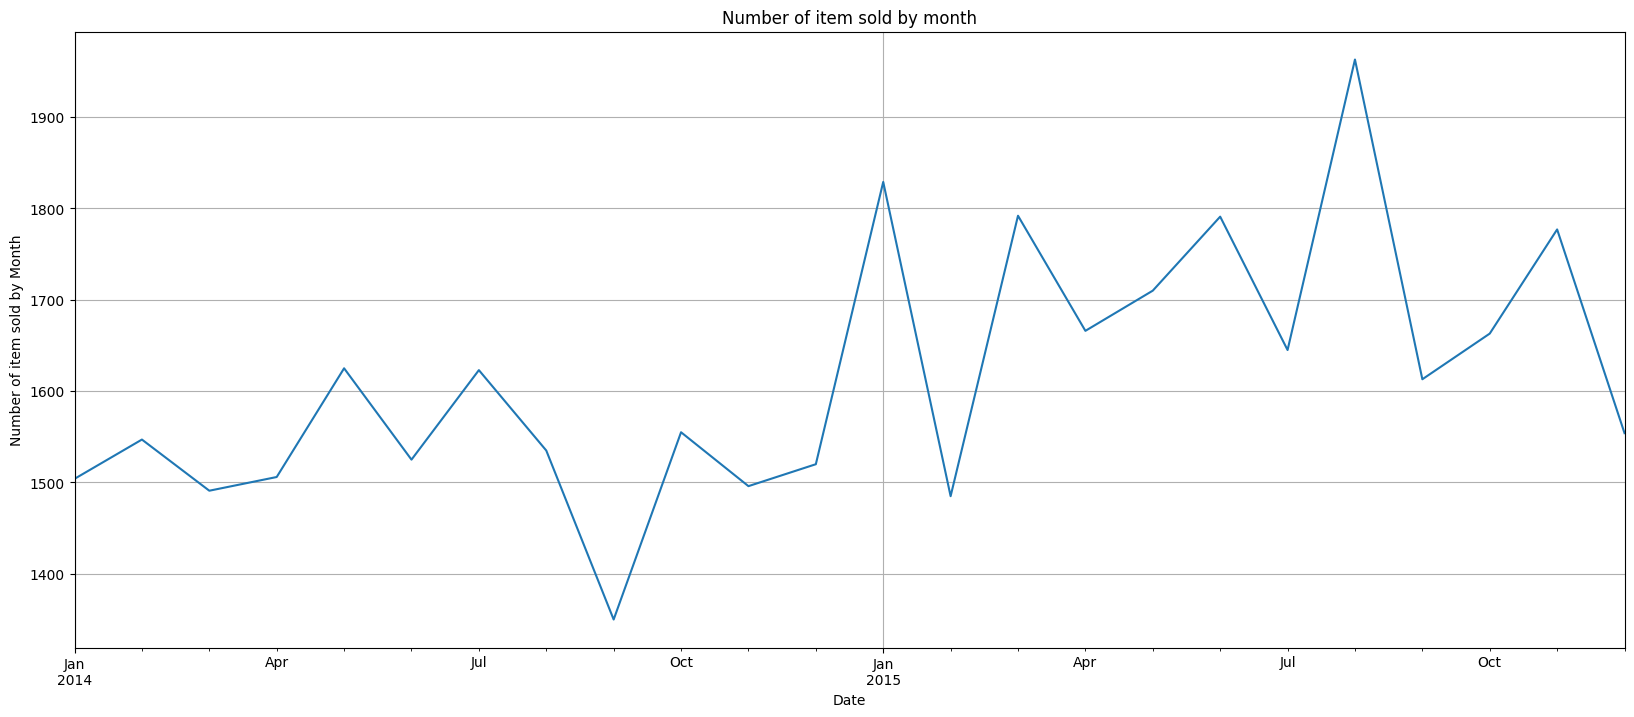

In [25]:
df_date.resample("M")["itemDescription"].count().plot(figsize=(20,8),grid=True,title="Number of item sold by month").set(xlabel="Date",ylabel="Number of item sold by Month")

Selecting only required variable for modeling and removing white space if any

In [30]:
cust_level=df[["Member_number","itemDescription"]].sort_values(by="Member_number",ascending=False)
cust_level["itemDescription"]=cust_level["itemDescription"].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [31]:
transactions=[a[1]['itemDescription'].tolist() for a in list (cust_level.groupby(["Member_number"]))]

<ipython-input-31-053ae18725cf>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  transactions=[a[1]['itemDescription'].tolist() for a in list (cust_level.groupby(["Member_number"]))]


The **apyori** library is a Python library for implementing the Apriori algorithm, which is a classic algorithm in data mining for association rule learning over transactional databases. The Apriori algorithm is used to discover frequent itemsets in a dataset and generate association rules.

In [34]:
#pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=73fdcc6783d1c5dbbee2a6a8aff65b1660ecaa363af20689fb44cb2d87976cdc
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [35]:
from apyori import apriori

In [37]:
rules = apriori(transactions=transactions,min_support=0.002,min_confidence=0.05,min_lift=3,min_length=2)

In [38]:
results=list(rules)

In [41]:
results

[RelationRecord(items=frozenset({'kitchen towels', 'UHT-milk'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'coffee', 'canned fruit'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'domestic eggs', 'meat spreads'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

"LHS" and "RHS" stand for "Left-Hand Side" and "Right-Hand Side," respectively. These terms are used to describe the parts of an association rule.

An association rule typically has the form:

**LHS⇒RHS**


- LHS (Left-Hand Side): This is the set of items found in the antecedent or the "if" part of the rule. It represents the conditions or items that are present.

- RHS (Right-Hand Side): This is the set of items found in the consequent or the "then" part of the rule. It represents the outcomes or items that are likely to be present given the conditions specified in the LHS.


The strength of an association rule is often measured in terms of support and confidence:

- Support: The proportion of transactions in the dataset that contain both the items in the LHS and RHS.

- Confidence: The likelihood that the rule holds true. It is the support of the combined LHS and RHS divided by the support of the LHS.


In [43]:
def inspect(results):
  lhs=[tuple(result[2][0][0])[0] for result in results]
  rhs=[tuple(result[2][0][1])[0] for result in results]
  supports = [result[1] for result in results]
  confidences = [result[2][0][2] for result in results]
  lifts = [result[2][0][3] for result in results]
  return list (zip(lhs,rhs,supports,confidences,lifts))
resultsindataframe = pd.DataFrame(inspect(results),columns=['Left Hand Side','Right Hand Side','Support','Confidence','Lift'])

In [44]:
resultsindataframe.nlargest(n=10,columns="Lift")

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
4915,bottled water,yogurt,0.002052,0.105263,14.654135
4914,bottled water,other vegetables,0.002052,0.105263,12.068111
2674,beef,pork,0.002052,0.242424,11.524021
3573,brown bread,specialty chocolate,0.002052,0.073394,11.443670
4133,long life bakery product,whole milk,0.002052,0.148148,11.105413
3290,bottled water,citrus fruit,0.002052,0.150943,10.322410
2904,brown bread,other vegetables,0.002309,0.097826,9.533152
5045,bottled water,soda,0.002052,0.135593,9.438257
2902,brown bread,domestic eggs,0.002052,0.086957,9.415459
2734,bottled water,brown bread,0.002309,0.118421,9.232105
